<h1><b>Libraries</b></h1>

In [243]:
import os #paths to file
from time import time
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
#ignore warnings influence output print
warnings.filterwarnings("ignore")

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib import colors

from IPython.display import clear_output
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers

from tensorflow.keras.layers import *

#relevant ML libraries
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

#ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

<h1><b>File Path</b></h1>

In [244]:
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#path for the training set
table1_path = "./data/wls_churn_master_target_t1.csv"
table2_path = "./data/wls_customer_demographics_t1.csv"
table3_path = "./data/wls_billing.csv"

<h1><b>Preprocessing and Data Analysis</b></h1>

<h2>Read datasets from files</h2>

In [245]:
# read in csv file as a DataFrame
t1_df = pd.read_csv(table1_path)
# explore the first 5 rows
t1_df.head()

,Customer_ID,mrc_current_month,mvsf_br_amt_current_month,mvsf_mrc_current_month,num_subs_current_month,num_voice_subs_current_month,num_nonvoice_subs_current_month,rev_current_month,churn
0,0,161.66,131.66,130.00,2,2,0,131.66,0.0
1,1,46.92,45.00,35.00,1,0,1,46.92,0.0
2,2,229.15,229.15,155.00,2,2,0,229.15,0.0
3,3,101.53,91.53,75.00,1,1,0,91.53,0.0
4,4,559.90,460.39,330.97,6,4,2,475.55,1.0


In [246]:
# read in csv file as a DataFrame
t2_df = pd.read_csv(table2_path)
# explore the first 5 rows
t2_df.head()

,Customer_ID,n_distinct_srvc_prov_state_cd_current_month,n_distinct_sls_indust_typ_txt_current_month,n_distinct_clli_exch_cd_current_month,n_distinct_billg_prov_state_cd_current_month,n_distinct_pymt_mthd_cd_current_month,n_distinct_rgnl_cust_prov_state_cd_current_month,n_distinct_cbu_cust_prov_state_cd_current_month,srvc_prov_state_cd_ab_ind_current_month,srvc_prov_state_cd_bc_ind_current_month,...,pymt_mthd_cd_tbsqbsb_ind_current_month,pymt_mthd_cd_tbsqbsh_ind_current_month,pymt_mthd_cd_tcso_ind_current_month,pymt_mthd_cd_tcsobpr_ind_current_month,pymt_mthd_cd_tcsoothr_ind_current_month,pymt_mthd_cd_tcsqothr_ind_current_month,pymt_mthd_cd_teso_ind_current_month,pymt_mthd_cd_tesobsb_ind_current_month,pymt_mthd_cd_tesoothr_ind_current_month,pymt_mthd_cd_tpsoothr_ind_current_month
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
# read in csv file as a DataFrame
t3_df = pd.read_csv(table3_path)
# explore the first 5 rows
t3_df.head()

,Customer_ID,write_off_ind_n_ind_current_month,write_off_ind_y_ind_current_month,payment_method_cd_c_ind_current_month,payment_method_cd_ca_ind_current_month,payment_method_cd_cc_ind_current_month,payment_method_cd_d_ind_current_month,payment_method_cd_dd_ind_current_month,payment_method_cd_r_ind_current_month,kb_payment_method_cd_c_ind_current_month,kb_payment_method_cd_d_ind_current_month,kb_payment_method_cd_r_ind_current_month,auto_payment_method_cd_ca_ind_current_month,auto_payment_method_cd_cc_ind_current_month,auto_payment_method_cd_dd_ind_current_month,kb_auto_payment_method_cd_c_ind_current_month,kb_auto_payment_method_cd_d_ind_current_month,kb_auto_payment_method_cd_r_ind_current_month
0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,3,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [248]:
# temp = pd.merge(t1_df, t2_df, on='Customer_ID', how='left')
# tr_df = pd.merge(temp, t3_df, on='Customer_ID', how='left')

In [249]:
t1_df.set_index('Customer_ID')
t2_df.set_index('Customer_ID')
t3_df.set_index('Customer_ID')
data = pd.concat([t1_df, t2_df, t3_df], axis=1, sort=False, join='inner')

In [250]:
data.head()

,Customer_ID,mrc_current_month,mvsf_br_amt_current_month,mvsf_mrc_current_month,num_subs_current_month,num_voice_subs_current_month,num_nonvoice_subs_current_month,rev_current_month,churn,Customer_ID,...,payment_method_cd_r_ind_current_month,kb_payment_method_cd_c_ind_current_month,kb_payment_method_cd_d_ind_current_month,kb_payment_method_cd_r_ind_current_month,auto_payment_method_cd_ca_ind_current_month,auto_payment_method_cd_cc_ind_current_month,auto_payment_method_cd_dd_ind_current_month,kb_auto_payment_method_cd_c_ind_current_month,kb_auto_payment_method_cd_d_ind_current_month,kb_auto_payment_method_cd_r_ind_current_month
0,0,161.66,131.66,130.00,2,2,0,131.66,0.0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,46.92,45.00,35.00,1,0,1,46.92,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,229.15,229.15,155.00,2,2,0,229.15,0.0,2,...,1,0,0,0,1,0,0,0,0,1
3,3,101.53,91.53,75.00,1,1,0,91.53,0.0,3,...,1,0,0,0,1,0,0,0,0,1
4,4,559.90,460.39,330.97,6,4,2,475.55,1.0,4,...,1,0,0,0,1,0,0,0,0,1


In [251]:
#summary statistics
data.describe()

,Customer_ID,mrc_current_month,mvsf_br_amt_current_month,mvsf_mrc_current_month,num_subs_current_month,num_voice_subs_current_month,num_nonvoice_subs_current_month,rev_current_month,churn,Customer_ID,...,payment_method_cd_r_ind_current_month,kb_payment_method_cd_c_ind_current_month,kb_payment_method_cd_d_ind_current_month,kb_payment_method_cd_r_ind_current_month,auto_payment_method_cd_ca_ind_current_month,auto_payment_method_cd_cc_ind_current_month,auto_payment_method_cd_dd_ind_current_month,kb_auto_payment_method_cd_c_ind_current_month,kb_auto_payment_method_cd_d_ind_current_month,kb_auto_payment_method_cd_r_ind_current_month
count,9590.000000,9590.000000,9581.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,...,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.00000,9590.000000,9590.00000,9590.000000
mean,4794.500000,285.333181,242.222068,214.325579,3.368822,2.940667,0.428154,241.719830,0.043379,4794.500000,...,0.375495,0.003650,0.001251,0.031804,0.375495,0.199166,0.03952,0.199166,0.03952,0.375495
std,2768.538875,342.629706,305.696945,239.242585,4.664134,3.829607,1.836581,307.237389,0.203718,2768.538875,...,0.484276,0.060305,0.035353,0.175487,0.484276,0.399394,0.19484,0.399394,0.19484,0.484276
min,0.000000,0.950000,-1317.090000,0.000000,1.000000,0.000000,0.000000,-1717.090000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
25%,2397.250000,106.750000,100.000000,80.000000,1.000000,1.000000,0.000000,100.402500,0.000000,2397.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
50%,4794.500000,192.615000,168.000000,150.000000,2.000000,2.000000,0.000000,168.535000,0.000000,4794.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
75%,7191.750000,342.287500,276.260000,260.000000,4.000000,3.000000,0.000000,275.502500,0.000000,7191.750000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,1.000000
max,9589.000000,10000.000000,10000.000000,4996.000000,93.000000,90.000000,80.000000,10000.000000,1.000000,9589.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000


In [252]:
#the Id column is not needed, let's drop it for both test and train datasets
data.drop('Customer_ID',axis=1,inplace=True)
#checking the new shapes
print(f"training set (row, col): {data.shape}\n")

training set (row, col): (9590, 117)



<h2>Missing values</h2>

In [253]:
#missing values in decsending order
data.isnull().sum().sort_values(ascending=False)

mvsf_br_amt_current_month                        9
pymt_mthd_cd_phb_ind_current_month               0
pymt_mthd_cd_tbsobsh_ind_current_month           0
pymt_mthd_cd_tbsobsb_ind_current_month           0
pymt_mthd_cd_tbsobpr_ind_current_month           0
                                                ..
billg_prov_state_cd_nt_ind_current_month         0
billg_prov_state_cd_ns_ind_current_month         0
billg_prov_state_cd_nl_ind_current_month         0
billg_prov_state_cd_nb_ind_current_month         0
kb_auto_payment_method_cd_r_ind_current_month    0
Length: 117, dtype: int64

In [254]:
data.dropna(axis=0, how='any', inplace=True)
#missing values in decsending order
data.isnull().sum().sort_values(ascending=False)

mrc_current_month                                0
pymt_mthd_cd_pre_ind_current_month               0
pymt_mthd_cd_tbsoothr_ind_current_month          0
pymt_mthd_cd_tbsobsh_ind_current_month           0
pymt_mthd_cd_tbsobsb_ind_current_month           0
                                                ..
billg_prov_state_cd_nu_ind_current_month         0
billg_prov_state_cd_nt_ind_current_month         0
billg_prov_state_cd_ns_ind_current_month         0
billg_prov_state_cd_nl_ind_current_month         0
kb_auto_payment_method_cd_r_ind_current_month    0
Length: 117, dtype: int64

<h2>Data visalization</h2>

In [255]:
#list of all the columns.columns
#Cols = tr_df.tolist()
#list of all the numeric columns
num = data.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = data.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  data[num]
#categoric df
loan_cat = data[cat]

kb_auto_payment_method_cd_r_ind_current_month
0    5980
1    3601
Name: count, dtype: int64


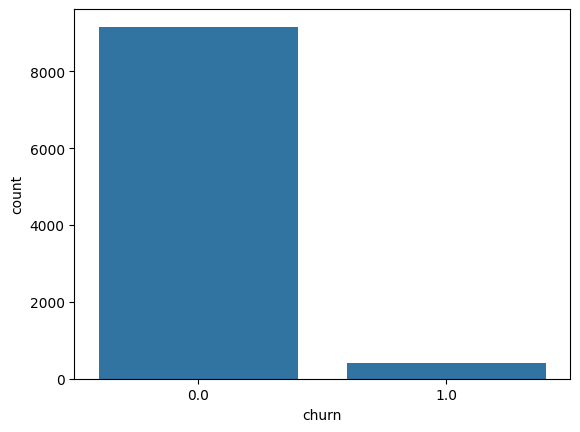

In [256]:
sns.countplot(x ='churn', data = data)
print(data[num[-1]].value_counts())

<h2>Encoding data to numreic</h2>

In [257]:
# converting categorical values to numbers
columns=data.select_dtypes(include=['object'])
for item in columns:
    data[item] = LabelEncoder().fit_transform(data[item])

data.describe()

,mrc_current_month,mvsf_br_amt_current_month,mvsf_mrc_current_month,num_subs_current_month,num_voice_subs_current_month,num_nonvoice_subs_current_month,rev_current_month,churn,n_distinct_srvc_prov_state_cd_current_month,n_distinct_sls_indust_typ_txt_current_month,...,payment_method_cd_r_ind_current_month,kb_payment_method_cd_c_ind_current_month,kb_payment_method_cd_d_ind_current_month,kb_payment_method_cd_r_ind_current_month,auto_payment_method_cd_ca_ind_current_month,auto_payment_method_cd_cc_ind_current_month,auto_payment_method_cd_dd_ind_current_month,kb_auto_payment_method_cd_c_ind_current_month,kb_auto_payment_method_cd_d_ind_current_month,kb_auto_payment_method_cd_r_ind_current_month
count,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.0,...,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000
mean,285.548503,242.222068,214.474199,3.370838,2.943117,0.427722,241.923408,0.043419,0.004071,0.0,...,0.375848,0.003653,0.001252,0.031834,0.375848,0.199353,0.039557,0.199353,0.039557,0.375848
std,342.715476,305.696945,239.301381,4.665820,3.830517,1.837364,307.306002,0.203810,0.063674,0.0,...,0.484366,0.060333,0.035370,0.175567,0.484366,0.399535,0.194927,0.399535,0.194927,0.484366
min,0.950000,-1317.090000,0.000000,1.000000,0.000000,0.000000,-1717.090000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106.830000,100.000000,80.000000,1.000000,1.000000,0.000000,100.520000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,192.900000,168.000000,150.000000,2.000000,2.000000,0.000000,168.780000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,342.720000,276.260000,260.000000,4.000000,3.000000,0.000000,275.600000,0.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,10000.000000,10000.000000,4996.000000,93.000000,90.000000,80.000000,10000.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [258]:
#correlation table 
corr = data.corr().dropna(axis=0, how='all').dropna(axis=1, how='all')
corr.style.background_gradient(cmap='coolwarm')

,mrc_current_month,mvsf_br_amt_current_month,mvsf_mrc_current_month,num_subs_current_month,num_voice_subs_current_month,num_nonvoice_subs_current_month,rev_current_month,churn,n_distinct_srvc_prov_state_cd_current_month,n_distinct_billg_prov_state_cd_current_month,n_distinct_rgnl_cust_prov_state_cd_current_month,n_distinct_cbu_cust_prov_state_cd_current_month,srvc_prov_state_cd_ab_ind_current_month,srvc_prov_state_cd_bc_ind_current_month,srvc_prov_state_cd_nb_ind_current_month,srvc_prov_state_cd_nl_ind_current_month,srvc_prov_state_cd_ns_ind_current_month,srvc_prov_state_cd_on_ind_current_month,billg_prov_state_cd_ab_ind_current_month,billg_prov_state_cd_bc_ind_current_month,billg_prov_state_cd_mb_ind_current_month,billg_prov_state_cd_nb_ind_current_month,billg_prov_state_cd_nl_ind_current_month,billg_prov_state_cd_ns_ind_current_month,billg_prov_state_cd_on_ind_current_month,billg_prov_state_cd_pe_ind_current_month,billg_prov_state_cd_qc_ind_current_month,billg_prov_state_cd_sk_ind_current_month,billg_prov_state_cd_yt_ind_current_month,rgnl_cust_prov_state_cd_ab_ind_current_month,rgnl_cust_prov_state_cd_bc_ind_current_month,rgnl_cust_prov_state_cd_mb_ind_current_month,rgnl_cust_prov_state_cd_nb_ind_current_month,rgnl_cust_prov_state_cd_nl_ind_current_month,rgnl_cust_prov_state_cd_ns_ind_current_month,rgnl_cust_prov_state_cd_on_ind_current_month,rgnl_cust_prov_state_cd_qc_ind_current_month,rgnl_cust_prov_state_cd_sk_ind_current_month,cbu_cust_prov_state_cd_ab_ind_current_month,cbu_cust_prov_state_cd_bc_ind_current_month,cbu_cust_prov_state_cd_mb_ind_current_month,cbu_cust_prov_state_cd_nb_ind_current_month,cbu_cust_prov_state_cd_ns_ind_current_month,cbu_cust_prov_state_cd_on_ind_current_month,cbu_cust_prov_state_cd_pe_ind_current_month,cbu_cust_prov_state_cd_qc_ind_current_month,cbu_cust_prov_state_cd_sk_ind_current_month,pymt_mthd_cd_tbsobem_ind_current_month,pymt_mthd_cd_tbsobpr_ind_current_month,pymt_mthd_cd_tbsobsb_ind_current_month,pymt_mthd_cd_tcsqothr_ind_current_month,payment_method_cd_c_ind_current_month,payment_method_cd_d_ind_current_month,payment_method_cd_r_ind_current_month,kb_payment_method_cd_c_ind_current_month,kb_payment_method_cd_d_ind_current_month,kb_payment_method_cd_r_ind_current_month,auto_payment_method_cd_ca_ind_current_month,auto_payment_method_cd_cc_ind_current_month,auto_payment_method_cd_dd_ind_current_month,kb_auto_payment_method_cd_c_ind_current_month,kb_auto_payment_method_cd_d_ind_current_month,kb_auto_payment_method_cd_r_ind_current_month
mrc_current_month,1.000000,0.941055,0.882497,0.813491,0.831244,0.332818,0.964854,0.021043,-0.003314,-0.002428,0.087883,0.091748,-0.008641,0.006686,-0.005712,-0.002325,0.004620,-0.001340,-0.018547,-0.015780,-0.003930,0.009529,-0.002075,0.022641,0.063010,0.003452,-0.039028,-0.021641,-0.004311,0.002614,0.006630,0.002895,0.012395,-0.001862,0.008135,0.106299,0.010631,0.077658,0.021313,0.016002,-0.009130,0.031129,0.074092,0.104750,0.004243,-0.001107,0.042275,0.238683,0.206557,-0.317144,-0.003568,-0.080616,-0.050017,-0.149887,0.000069,0.007172,-0.040597,-0.149887,-0.080616,-0.050017,-0.080616,-0.050017,-0.149887
mvsf_br_amt_current_month,0.941055,1.000000,0.821344,0.785852,0.790719,0.347117,0.962211,0.020248,-0.001098,0.000655,0.064728,0.089566,-0.009820,0.006035,-0.005089,-0.002525,0.006104,0.002291,-0.011464,-0.014002,-0.009166,0.012474,-0.002719,0.024027,0.051031,0.006124,-0.035985,-0.020771,-0.004281,-0.000667,0.000325,-0.003994,0.007861,-0.002471,0.006295,0.085979,0.008020,0.053526,0.017500,0.020473,-0.012058,0.039598,0.035607,0.102536,0.005391,0.006073,0.028572,0.227814,0.216271,-0.313802,-0.004946,-0.072492,-0.043334,-0.136559,0.004303,0.012423,-0.034526,-0.136559,-0.072492,-0.043334,-0.072492,-0.043334,-0.136559
mvsf_mrc_current_month,0.882497,0.821344,1.000000,0.917598,0.942037,0.366207,0.821631,0.023006,0.002111,0.002362,0.079042,0.081278,-0.007094,0.012312,-0.005357,-0.000618,0.002798,0.001461,-0.016608,-0.010844,-0.007914,0.013423,0.000379,0.010698,0.07

<h1><b>Machine learning models</b></h1>

In [259]:
#First of all we will divide our dataset into two variables X as the features we defined earlier and y as the Loan_Status the target value we want to predict.
y = data['churn']
X = data.drop('churn', axis = 1)
smote = SMOTE() # Synthetic Minority Oversampling TEchnique
X, y = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<h2>Decision Tree</h2>

Training Data Set balanced accuracy:  0.7492069573646556
Training Data F1 Score  0.7671193296735048
Validation Mean F1 Score:  0.7408774168313574
Validation Mean balanced accuracy:  0.7428737623744479


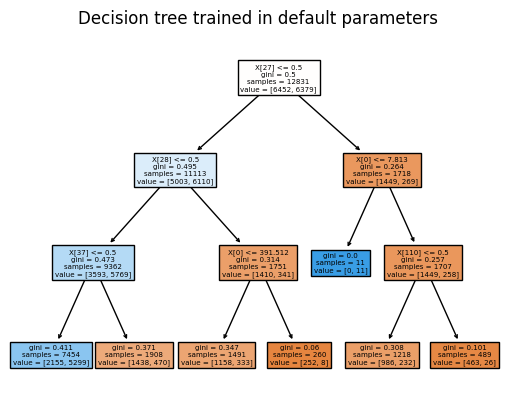

In [260]:
#Choose Classifier and fit the model use default attribute
DCT = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 2)
DCT.fit(X_train,y_train)
y_predict = DCT.predict(X_train)

# balanced accuracy score
print("Training Data Set balanced accuracy: ", balanced_accuracy_score(y_train,y_predict))
print("Training Data F1 Score ", f1_score(y_train,y_predict))
print("Validation Mean F1 Score: ",cross_val_score(DCT,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean balanced accuracy: ",cross_val_score(DCT,X_train,y_train,cv=5,scoring='balanced_accuracy').mean())
#plot the decision tree with unlimited max depth
plot_tree(DCT, filled=True)
plt.title("Decision tree trained in default parameters")
plt.show()

In [261]:
list = X_train.columns.to_list()
print(list[0],list[25],list[106],list[27])

mrc_current_month srvc_prov_state_cd_sk_ind_current_month payment_method_cd_r_ind_current_month billg_prov_state_cd_ab_ind_current_month


<h2>Boost(adaBoost)</h2>

In [262]:
#Choose Classifier and fit the model use default attribute
ADA = AdaBoostClassifier()
ADA.fit(X_train, y_train)

y_predict = ADA.predict(X_train)

# balanced accuracy score
print("Training Data Set balanced accuracy: ", balanced_accuracy_score(y_train,y_predict))
print("Training Data F1 Score ", f1_score(y_train,y_predict))
print("Validation Mean F1 Score: ",cross_val_score(ADA,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean balanced accuracy: ",cross_val_score(ADA,X_train,y_train,cv=5,scoring='balanced_accuracy').mean())

Training Data Set balanced accuracy:  0.8732454270332743
Training Data F1 Score  0.8647882627542514
Validation Mean F1 Score:  0.8739322118943255
Validation Mean balanced accuracy:  0.874274921342099


<h2>SVM</h2>

In [263]:
#Choose Classifier and fit the model use default attribute (Default is rbf)
SVM = SVC()
SVM.fit(X_train, y_train)
y_predict = SVM.predict(X_test)

# Balanced Accuracy score
print("Training Data Set Balanced Accuracy: ", balanced_accuracy_score(y_true=y_test,y_pred=y_predict))
print("Training Data F1 Score ", f1_score(y_true=y_test,y_pred=y_predict))
print("Validation Mean F1 Score: ",cross_val_score(SVM,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Balanced Accuracy: ",cross_val_score(SVM,X_train,y_train,cv=5,scoring='balanced_accuracy').mean())

Training Data Set Balanced Accuracy:  0.5687121961235804
Training Data F1 Score  0.474090407938258
Validation Mean F1 Score:  0.5461212433693701
Validation Mean Balanced Accuracy:  0.5610293726805539


<h2>KNN</h2>

In [264]:
#Choose Classifier and fit the model use default attribute
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_predict = KNN.predict(X_test)

# Balanced Accuracy score
print("Training Data Set Balanced Accuracy: ", balanced_accuracy_score(y_true=y_test,y_pred=y_predict))
print("Training Data F1 Score ", f1_score(y_true=y_test,y_pred=y_predict))
print("Validation Mean F1 Score: ",cross_val_score(KNN,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Balanced Accuracy: ",cross_val_score(KNN,X_train,y_train,cv=5,scoring='balanced_accuracy').mean())

Training Data Set Balanced Accuracy:  0.846413164765431
Training Data F1 Score  0.8616248348745046
Validation Mean F1 Score:  0.8169902721133739
Validation Mean Balanced Accuracy:  0.8197475579297615


<h2>Neural Networks </h2>

In [265]:
#Choose Classifier and fit the model use default attribute
MLP = MLPClassifier()
MLP.fit(X_train, y_train)

y_predict = MLP.predict(X_train)

# Balanced Accuracy score
print("Training Data Set Balanced Accuracy: ", balanced_accuracy_score(y_train,y_predict))
print("Training Data F1 Score ", f1_score(y_train,y_predict))
print("Validation Mean F1 Score: ",cross_val_score(MLP,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Balanced Accuracy: ",cross_val_score(MLP,X_train,y_train,cv=5,scoring='balanced_accuracy').mean())

Training Data Set Balanced Accuracy:  0.7416747713431597
Training Data F1 Score  0.7826030170443413
Validation Mean F1 Score:  0.8411178656794638
Validation Mean Balanced Accuracy:  0.8499036933897486


<h2>PCA</h2>

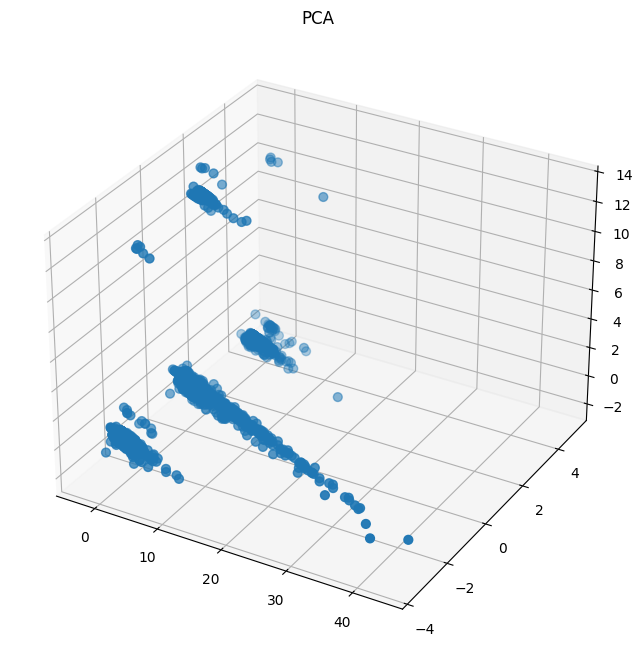

In [266]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
X_scale = StandardScaler().fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X_scale)
X_pca_array = pca.transform(X_scale)
X_pca = pd.DataFrame(X_pca_array, columns=(["col1","col2", "col3"]))
x =X_pca["col1"]
y =X_pca["col2"]
z =X_pca["col3"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, marker='o', cmap = cmap )
ax.set_title("PCA")
plt.show()